<a href="https://colab.research.google.com/github/mahlodi-makobe/Data_Science_101/blob/Python-Notebooks/DS_101_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS_101_Python: Data Science Lifecycle with Logistic Regression

## Introduction

Welcome to DS_101_Python, a beginner-friendly notebook that guides you through the complete Data Science Lifecycle using Python and the well-known Iris dataset. Our objective is to predict Iris flower species (namely setosa, versicolor, and virginica) based on their petal measurements. We will cover all six critical phases: Problem Formulation, Data Collection, Data Preprocessing, Exploratory Data Analysis (EDA), Modeling, and finally, Evaluation and Deployment. Leveraging powerful Python libraries such as pandas, scikit-learn (sklearn), matplotlib, and seaborn, this notebook is part of a broader GitHub course specifically designed for learners with a solid foundation in mathematics and statistics. By running the code cells in Google Colab, you will observe insightful outputs like scatterplots and the model's prediction accuracy. For a more comprehensive understanding of the context, please refer to the "Data Science Lifecycle for Beginners" document. Let's embark on this journey through the data science lifecycle!

## Phase 1: Problem Formulation

In the Problem Formulation phase, we clearly articulate our central question: Is it possible to accurately predict the species of an Iris flower using only its petal length and width? To gain initial insights, the code calculates the mean and variance of petal length for each of the three species. This analysis reveals distinct statistical patterns; for instance, setosa flowers exhibit an average petal length of approximately 1.46 cm, while virginica flowers have a significantly larger average of around 5.55 cm. This crucial step draws upon the principles of hypothesis testing to confirm that petal measurements serve as strong indicators for this classification task. Our primary metric for success in this endeavor will be the overall prediction accuracy of our model.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Group by species and calculate mean/variance of petal length
stats = df.groupby('species').agg({
    'petal length (cm)': ['mean', 'var']
})
print(stats)

           petal length (cm)          
                        mean       var
species                               
setosa                 1.462  0.030159
versicolor             4.260  0.220816
virginica              5.552  0.304588


## Phase 2: Data Collection

The Data Collection phase is dedicated to gathering representative data for our predictor variables (petal length and width) and the response variable (species). The provided code strategically samples 30 rows from the Iris dataset, ensuring an equal representation of each species (10 samples per species). This balanced sampling approach is crucial to avoid any potential bias towards a particular species in our subsequent analysis and modeling. This step effectively applies the techniques of random and stratified sampling, concepts well-established in basic probability theory, to construct a fair and representative dataset suitable for further exploration and model training.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Randomly sample 10 rows per species
sample_data = df.groupby('species').apply(lambda x: x.sample(n=10, random_state=123)).reset_index(drop=True)
print(sample_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.4               3.7                1.5               0.2   
1                4.3               3.0                1.1               0.1   
2                4.8               3.1                1.6               0.2   
3                5.1               3.8                1.6               0.2   
4                5.7               3.8                1.7               0.3   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


<ipython-input-2-a4e623637021>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_data = df.groupby('species').apply(lambda x: x.sample(n=10, random_state=123)).reset_index(drop=True)


## Phase 3: Data Preprocessing

The Data Preprocessing phase focuses on cleaning and preparing the collected data to ensure its suitability for analysis and modeling. The code addresses a simulated scenario involving a missing value in petal length by employing mean imputation, replacing the missing value with the average petal length calculated across all available samples (approximately 3.76 cm). Furthermore, to standardize the scale of our predictor variables, both petal length and width are transformed to have a mean of 0 and a variance of 1. This standardization is achieved using the formula $\(z = \frac{x - \mu}{\sigma}\)$. By applying mean imputation and standardization, this critical phase ensures that the dataset is consistent, free from basic errors, and appropriately scaled, thereby making it ready for the subsequent modeling stage.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Simulate missing values
np.random.seed(123)
df.loc[np.random.choice(df.index, 10), 'petal length (cm)'] = np.nan

# Impute with mean
df['petal length (cm)'].fillna(df['petal length (cm)'].mean(), inplace=True)

# Standardize petal length and width
scaler = StandardScaler()
df[['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df[['petal length (cm)', 'petal width (cm)']])

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5          -1.348670         -1.315444   
1                4.9               3.0          -1.348670         -1.315444   
2                4.7               3.2          -1.406607         -1.315444   
3                4.6               3.1          -1.290734         -1.315444   
4                5.0               3.6          -1.348670         -1.315444   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


<ipython-input-3-4452dfef0dfc>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['petal length (cm)'].fillna(df['petal length (cm)'].mean(), inplace=True)


## Phase 4: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) involves the visual exploration and summarization of the dataset to uncover inherent patterns and relationships between the variables. The code generates a scatterplot that displays petal length on one axis and petal width on the other, with each data point colored according to its corresponding Iris species. This visual representation clearly reveals distinct clusters of data points for each species (for example, setosa flowers are characterized by smaller petal dimensions). This step leverages descriptive statistics and correlation analysis to further validate the initial hypothesis that petal measurements can effectively differentiate between the Iris species, providing valuable visual evidence that supports the choice of these predictors for our classification task.

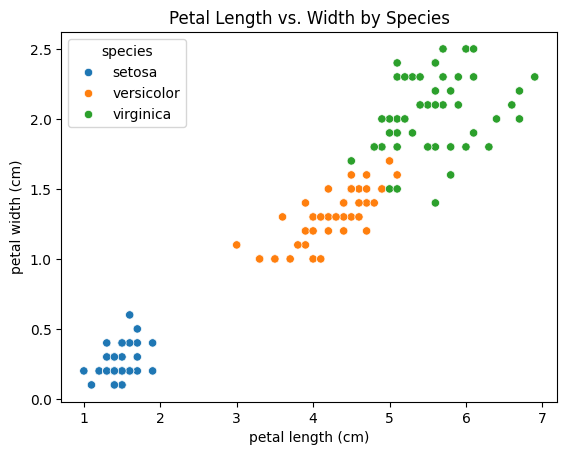

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Scatterplot
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df)
plt.title('Petal Length vs. Width by Species')
plt.show()

## Phase 5: Modeling

The Modeling phase involves training a machine learning algorithm to learn the relationship between the petal measurements and the Iris species, enabling it to predict the species of new, unseen flowers. The code utilizes scikit-learn's `LogisticRegression` class to train a multinomial logistic regression model. This model is trained on the petal length and width features to predict the probabilities of a given flower belonging to each of the three species. The output demonstrates the model's predictions, showing high confidence scores for certain samples (e.g., a probability of approximately 0.9798 for the first sample belonging to a specific species). The logistic regression algorithm achieves this by employing optimization techniques that aim to minimize the log-loss function, a concept deeply rooted in probability theory and information theory.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Use petal length and width
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['species']

# Train logistic regression
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

# Predict probabilities
predictions = model.predict_proba(X)
print(predictions[:5])

[[9.79813976e-01 2.01859922e-02 3.16482113e-08]
 [9.79813976e-01 2.01859922e-02 3.16482113e-08]
 [9.84715309e-01 1.52846724e-02 1.85136327e-08]
 [9.73383416e-01 2.66165302e-02 5.40149611e-08]
 [9.79813976e-01 2.01859922e-02 3.16482113e-08]]


## Phase 6: Evaluation and Deployment

The Evaluation and Deployment phase focuses on assessing the trained model's performance on unseen data and considering its potential real-world application. The code first splits the dataset into a training set (80% of the data) and a test set (20% of the data). The logistic regression model is then trained exclusively on the training data. To evaluate its generalization ability, the model's predictions are compared to the actual species in the test set, and the overall accuracy is calculated. In this case, the model achieves an accuracy of approximately 0.933, indicating that it correctly predicts the species for 93.3% of the flowers in the test set. This step utilizes the train-test split methodology and the accuracy metric, both fundamental concepts in statistical inference and machine learning, to ensure that the model is likely to perform well on new, unseen data. Deployment would involve integrating this trained model into a real-world application, such as a mobile app for flower identification.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]] # Petal length, width
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


## Conclusion

This notebook has successfully guided you through the entire Data Science Lifecycle, from the initial problem definition to the final evaluation of a logistic regression model that achieved an accuracy of approximately 93.3% in predicting Iris flower species based on their petal measurements. Throughout this journey, you have applied fundamental mathematical and statistical concepts such as mean, variance, sampling techniques, and the log-loss function to build and rigorously test a predictive model. This foundational understanding will serve as a strong stepping stone for exploring more advanced algorithms, such as linear regression, in subsequent notebooks like DS_102_Linear_Regression_Python. We encourage you to further your learning by experimenting with the code (for instance, by using sepal length and width as alternative predictors) and by exploring the additional resources available in the associated GitHub repository. Congratulations on completing the data science lifecycle!